In [1]:
from Bio import AlignIO
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw
from Bio import SeqIO
from Bio import Phylo, AlignIO
import subprocess
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from Bio.Align.Applications import ClustalOmegaCommandline


In [2]:
os.listdir('sequences/') # show fasta files to import:

['cov_mers.fasta',
 'cov_Rhinolophus.fasta',
 'all.fasta',
 '.DS_Store',
 'test',
 'cov_anatidae.fasta',
 'aligned.fasta',
 'cov_apodemus.fasta',
 'cov_sapiens.fasta',
 'cov_gallus.fasta']

# Read the data from fasta files:
<br>
<br>
Here we explore several string of the Coronaviridae familly from different host species: 
<br>

-------------------------------------------------
| Code:      | host:              |             |
|------------|--------------------|-------------|
| MN996528   |  Homo Sapiens      | SARS-CoV-2  |
|            |                    |             |
| NC_019843  |  Homo Sapiens      | MERS-CoV    |
|            |                    |             |
| JQ065048   |  Anatidae          |             |
|            |                    |             |
| MG772934   | Rhinolophus        |             |
|            |                    |             |
| NC_034972  | Apodemus chevrieri |             |
|            |                    |             |
| KX38909    | Gallus gallus      |             |

<br>


Gallus: Chicken, covid19: H. Sapiens, Rhinolophus: Bat, Anatidae: Duck, Mers: H. Sapiens MERS.

<br>

*The data can be downloaded here:* https://www.ncbi.nlm.nih.gov/labs/virus/vssi/

<br>




In [3]:
gallus = SeqIO.read("sequences/cov_gallus.fasta", "fasta") #Chicken
covid19 = SeqIO.read("sequences/cov_sapiens.fasta", "fasta") #H. Sapiens Covid-19
rhinolophus = SeqIO.read("sequences/cov_Rhinolophus.fasta", "fasta") #Bat
anatidae = SeqIO.read("sequences/cov_anatidae.fasta", "fasta")# Duck/swan
mers = SeqIO.read('sequences/cov_mers.fasta', 'fasta') # H. Sapiens MERS
apodemus = SeqIO.read('sequences/cov_apodemus.fasta', 'fasta') #Apodemus chevrieri

#Create string sequence exemple:
#print(str(gallus.seq))
list_rec=[gallus, covid19, rhinolophus, anatidae, mers, apodemus]

In [4]:
#reads = SeqIO.parse(file,"fasta")
end = []

for record in list_rec:
    #record[:n].append(end)
    end.append(record)
    
SeqIO.write(end, "sequences/all.fasta", "fasta")

6

# Alignement
<br>
<br>
Performed using clustral, 
be sure to download the binaries from http://www.clustal.org/omega/
<br>
<br>
the binary file must be saved in the same folder as the execution file (this one) and permission must be adapted (for Linux/MAC: chmod 777 clustal-omega-1.2.3-macosx  Change the binary file name with the one corresponding to your download)

In [5]:
# Define input file
in_file = "sequences/all.fasta"

# Define output file
out_file = "sequences/aligned.fasta"

# Get the command for Clustal Omega
clustalomega_cline = ClustalOmegaCommandline(infile=in_file, outfile=out_file, verbose=True, auto=True)

# Print the executable command
print(clustalomega_cline)

clustalo -i sequences/all.fasta -o sequences/aligned.fasta --auto -v


In [6]:
!./clustal-omega-1.2.3-macosx -i sequences/all.fasta -o sequences/aligned.fasta --auto --force  -v

Using 8 threads
Read 6 sequences (type: DNA) from sequences/all.fasta
not more sequences (6) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Using 5 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 6 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress done. CPU time: 6.30u 0.03s 00:00:06.33 Elapsed: 00:00:02
mBed created 1 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)
Distance calculation within sub-clusters done. CPU time: 6.17u 0.02s 00:00:06.19 Elapsed: 00:00:02
Guide-tree computation (mBed) done.
Progressive alignment progress done. CPU time: 492.34u 15.26s 00:08:27.60 Elapsed: 00:05:32
Iteration step 1 out of 1
Computing new guide tree (iteration step 0)
Calculating pairwise aligned identity distances...
Pairwise i

In [7]:
align = AlignIO.read("sequences/aligned.fasta", "fasta")
print(align)

SingleLetterAlphabet() alignment with 6 rows and 37932 columns
----------------------ACTGAAAATAGATATTAATATA...--- KX389094
-------------------------ATTAAAGGTTTATACCTTC...--- MN996528
-------------------------ATATTAGGTTTTTACCTTC...--- MG772934
--------GTCATTTGGTAAAATATAATATATATTTTATCACTC...AAA JQ065048
--------------------------------GATTTAAGTGAA...--- NC_019843
AGAAACAAGTAGTGTTTTAAAAACCTTCAAATTAGTGCCTGTAA...--- NC_034972


# Calculate distance:

In [9]:
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

# Create the Phylogenetic Tree


Distance Matrix:
-----------------------
KX389094	0
MN996528	0.5484024043024359	0
MG772934	0.5511177897289887	0.09946746810081197	0
JQ065048	0.5713118211536434	0.6185015290519877	0.6218496256458926	0
NC_019843	0.5494832858799958	0.47126436781609193	0.47440156068754613	0.627807655805125	0
NC_034972	0.5556522197616788	0.558947590424971	0.5582094273963936	0.591584941474217	0.5781398291679849	0
	KX389094	MN996528	MG772934	JQ065048	NC_019843	NC_034972

Phylogenetic Tree:
-----------------------
  __________________________________________________________________ JQ065048
 |
_|   _______________________________________________________________ NC_034972
 |  |
 |__|          _____________________________________________________ NC_019843
    |  _______|
    | |       |                                          ___________ MG772934
    |_|       |_________________________________________|
      |                                                 |___________ MN996528
      |
      |______________

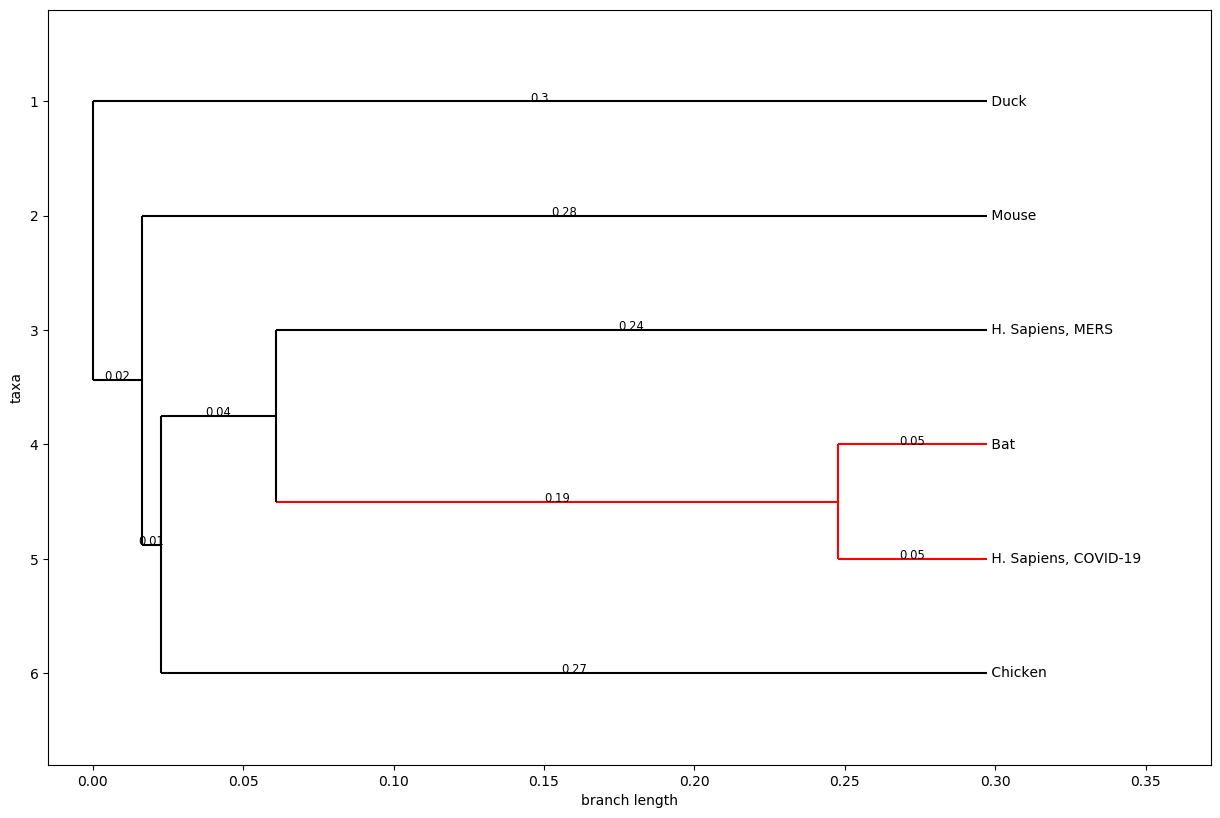

In [29]:



def get_label(leaf):
    code=['JQ065048', 'MN996528', 'NC_034972', 'NC_019843', 'KX389094', 'MG772934']
    host=['Wigeon', 'H. Sapiens, COVID-19', 'Rodent', 'H. Sapiens, MERS', 'Red junglefowl', 'Horseshoe bat']
    
    if leaf.name.startswith('Inner'):
        name=''
        return name
    else:
        
        for i in range(0, len(code)):
            if leaf.name==code[i]:
                name=host[i]
                return name
            
            #return ''
        #name=leaf.name

    #return name


print('\nDistance Matrix:\n-----------------------')
print(dm)

# Phylogenetic tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
#tree = constructor.upgma(dm) # We color the human strain, SARS and SARS-CoV-2 in blue
#tree.clade[1, 1, 0].color = "black"
mrca = tree.common_ancestor({'name':  'MG772934'}, {'name': 'MN996528'})
mrca.color = "red"

fig = plt.figure(figsize=(15, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)
#Phylo.draw(tree, axes=axes, label_func=get_label)
Phylo.draw(tree, axes=axes, label_func=get_label, branch_labels=lambda c: round(c.branch_length, 2), do_show=False)
plt.savefig('tree.png')

print('\nPhylogenetic Tree:\n-----------------------')
Phylo.draw_ascii(tree)

<br>
<br>

# Readings from multiple alignements file:

<br>
<br>
Here we imported the alignement of differents strains SARS-CoV-2 from fifférent countries directly from https://www.ncbi.nlm.nih.gov/labs/virus/vssi/
<br>
The alignement file is then read as a fasta file.


In [17]:

from Bio import SeqIO
from Bio import AlignIO

align = AlignIO.read("sequences/multiple_cov_align.fasta", "fasta")


In [18]:
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

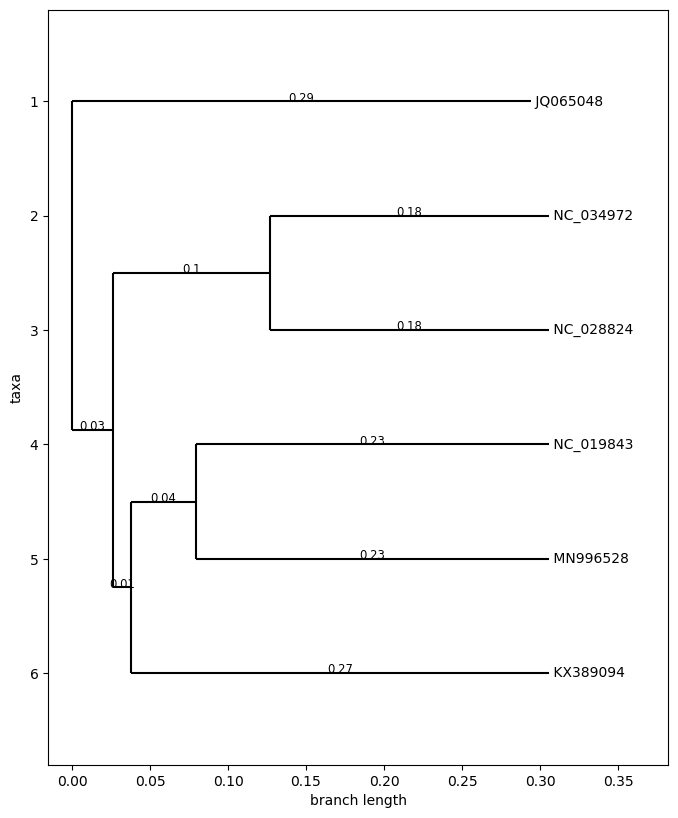

In [53]:

def get_label(leaf):
    if leaf.name.startswith('Inner'):
        name=''
    else:
        name=leaf.name

    return name

constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

fig = plt.figure(figsize=(8, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)

#Phylo.draw(tree, axes=axes, do_show=False)
Phylo.draw(tree, axes=axes, label_func=get_label, branch_labels=lambda c: round(c.branch_length, 2), do_show=False)
plt.savefig('tree2.png')
